In [1]:
import pandas as pd
heart_data = pd.read_csv('heart.csv')
heart_data.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [2]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
data_input = heart_data.drop(columns = ['target'])
data_output = heart_data['target']

In [4]:
data_input.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [5]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
data_output.unique()

array([0, 1], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(data_input,data_output,test_size = 0.33,random_state=2)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.33,random_state=2)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(459, 13)
(459,)
(227, 13)
(227,)
(339, 13)
(339,)


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier(max_depth=2,random_state=2)

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)

In [14]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.7821350762527233
0.7268722466960352


In [15]:
max_depth_values=[1,2,3,4,5,6,7,8]
train_accuracy_values=[]
val_accuracy_values=[]
for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val=model.predict(x_val)
    acc_train= accuracy_score(y_train,y_pred_train)
    acc_val= accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

In [16]:
val_accuracy_values

[0.7444933920704846,
 0.7268722466960352,
 0.801762114537445,
 0.8458149779735683,
 0.8414096916299559,
 0.9030837004405287,
 0.9427312775330396,
 0.947136563876652]

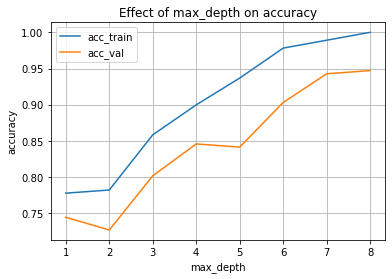

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(max_depth_values,train_accuracy_values,label='acc_train')
plt.plot(max_depth_values,val_accuracy_values,label='acc_val')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()

In [18]:
model_best = DecisionTreeClassifier(max_depth=3,random_state=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [19]:
y_pred_test = model_best.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.8259587020648967


In [20]:
import pickle
with open('saved-model','wb') as f:
    pickle.dump(model_best,f)

In [21]:
with open('saved-model','rb') as f:
    pickle.load(f)

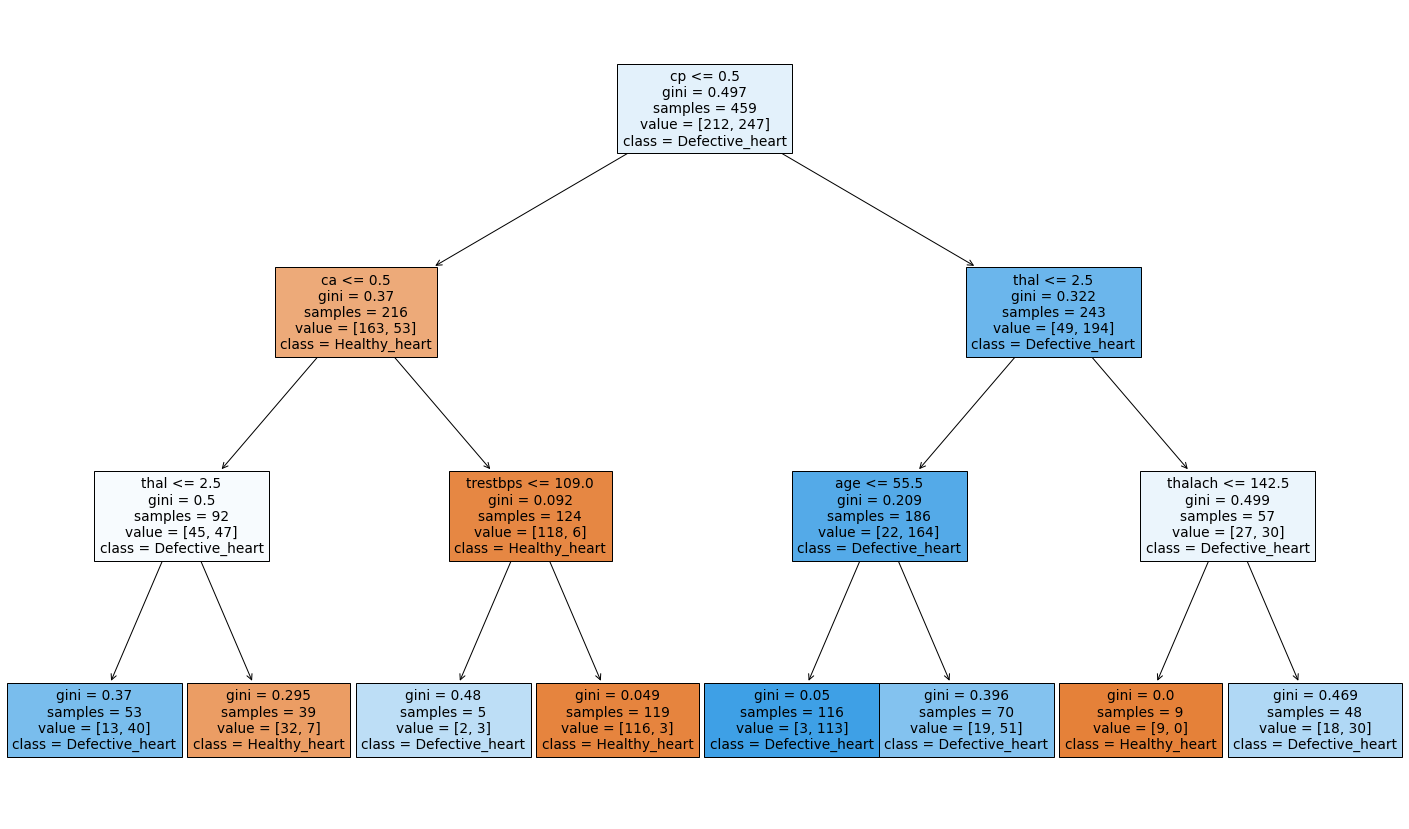

In [22]:
from sklearn import tree 
plt.figure(figsize=(25,15))
tree.plot_tree(model_best,feature_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
,class_names = ['Healthy_heart','Defective_heart'],filled = True)
plt.show()

In [23]:
model_best.feature_importances_

array([0.03965429, 0.        , 0.52672097, 0.02387935, 0.        ,
       0.        , 0.        , 0.04459414, 0.        , 0.        ,
       0.        , 0.1701591 , 0.19499216])

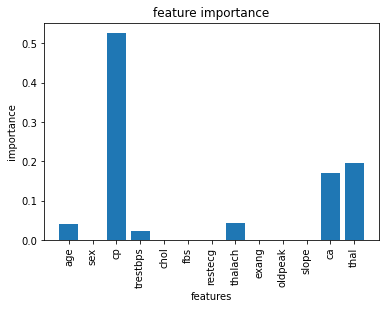

In [24]:
feature_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
plt.bar(feature_names,model_best.feature_importances_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('feature importance')
plt.show()

In [25]:
test_input_data = (52,1,0,125,212,0,1,168,0,1.0,2,2,3)
import numpy as np
test_input_data_arr = np.asarray(test_input_data)
test_input_data_reshaped = test_input_data_arr.reshape(1,-1)
prediction = model_best.predict(test_input_data_reshaped)
if prediction[0] == 0:
        print("Prediction is: 0 is //The person is healthy //" )
else:
    print("Prediction is: 1 is //The person has heart defect //")

Prediction is: 0 is //The person is healthy //


In [26]:
test_input_data = (45,0,0,138,236,0,0,152,1,0.2,1,0,2)
import numpy as np
test_input_data_arr = np.asarray(test_input_data)
test_input_data_reshaped = test_input_data_arr.reshape(1,-1)
prediction = model_best.predict(test_input_data_reshaped)
if prediction[0] == 0:
        print("Prediction is: 0 is //The person is healthy //" )
else:
    print("Prediction is: 1 is //The person has heart defect //")

Prediction is: 1 is //The person has heart defect //
